In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import cm
import pickle
import copy

In [2]:
pickle.HIGHEST_PROTOCOL

5

### Plot Figure 3, panel c)

#### HR configuration

In [3]:
with open('../data/data_Fig3c_HR.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataHR = pickle.load(f)

In [4]:
conc_data_SEP_30yr_end_constructed = dataHR['HRscen_conc_begin'] + dataHR['HRclimate_change_signal_SEP']
conc_control_SEP_30yr_rolSTD=dataHR['HRctrl_conc_rolSTD']
conc_control_SEP_30yr_rolSTD_masked=np.ma.masked_equal(conc_control_SEP_30yr_rolSTD, 0.)
conc_control_SEP_30yr_rolSTD_masked.min(), conc_control_SEP_30yr_rolSTD_masked.max()

(2.8139039406916863e-05, 0.103664199038952)

In [5]:
# HR control 30yr-rolling standard deviation
z = conc_control_SEP_30yr_rolSTD_masked.filled(fill_value=-999)

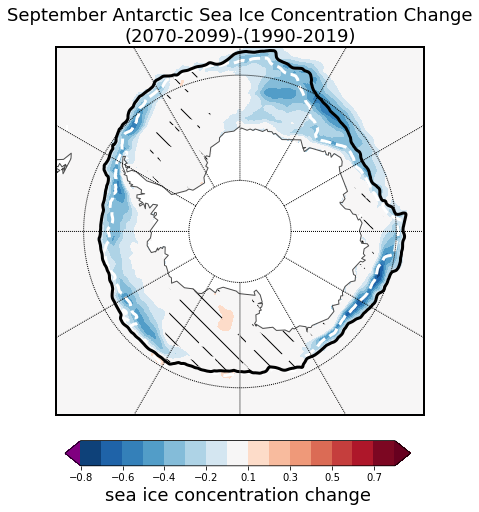

In [6]:
#-- plot everything together
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

#-- set nan to white
cmap=copy.copy(plt.cm.RdBu_r)
cmap.set_bad('white',1.)
cmap.set_under('purple')

map = Basemap(projection='spstere',lon_0=180, boundinglat=-55, resolution='c')
x, y = map(dataHR['HRmeshx2'], dataHR['HRmeshy2'])
levels = np.array([-0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

#-- HR

#-- plot pattern
im = plt.tricontourf(x, y, dataHR['elem_no_nan'], dataHR['HRclimate_change_signal_SEP'], levels=levels, cmap=cmap, extend='both')

#-- construct the end contour from beginning + climate change signal
plt.tricontour(x, y, dataHR['elem_no_nan'], conc_data_SEP_30yr_end_constructed, levels=[0.15], vmin=levels[0], vmax=levels[-1], colors=['w','w'], linewidths=[3], linestyles=['dashed','solid'])
# extent lines (begin)
plt.tricontour(x, y, dataHR['elem_no_nan'], dataHR['HRscen_conc_begin'], levels=[0.15], vmin=levels[0], vmax=levels[-1], colors=['k','b'], linewidths=[3])

#-- (non-)significance hatching
significance_hatching=np.abs(dataHR['HRclimate_change_signal_SEP']) > 2*z
# limit to area where ice is
significance_hatching[dataHR['HRscen_conc_begin']<0.15]=1.
imS = plt.tricontourf(x, y, dataHR['elem_no_nan'], ~significance_hatching, levels=[.9,1.1], hatches="\\", colors='none')

#-- draw grey coastlines and thick black outline
map.drawcoastlines(linewidth=1.0, linestyle='solid', color='0.3', antialiased=1)
map.drawmapboundary(linewidth=2.0, color='black')

map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

plt.title('September Antarctic Sea Ice Concentration Change\n(2070-2099)-(1990-2019)', fontsize=18)

#-- add colorbar at bottom
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.31, 0.05, 0.4, 0.05]) #[left, bottom, width, height] 
cbar = fig.colorbar(im, orientation='horizontal', cax=cbar_ax);
cbar.set_label("sea ice concentration change", fontsize=18)
plt.show()

In [7]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure3c_HR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

#### LR configuration

In [8]:
with open('../data/data_Fig3c_LR.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataLR = pickle.load(f)

In [9]:
conc_data_SEP_30yr_end_constructed = dataLR['LRscen_conc_begin'] + dataLR['LRclimate_change_signal_SEP']
conc_control_SEP_30yr_rolSTD=dataLR['LRctrl_conc_rolSTD']
conc_control_SEP_30yr_rolSTD_masked=np.ma.masked_equal(conc_control_SEP_30yr_rolSTD, 0.)
conc_control_SEP_30yr_rolSTD_masked.min(), conc_control_SEP_30yr_rolSTD_masked.max()

(0.00027260265599325444, 0.1305119948652589)

In [10]:
# LR control 30yr-rolling standard deviation
z = conc_control_SEP_30yr_rolSTD_masked.filled(fill_value=-999)

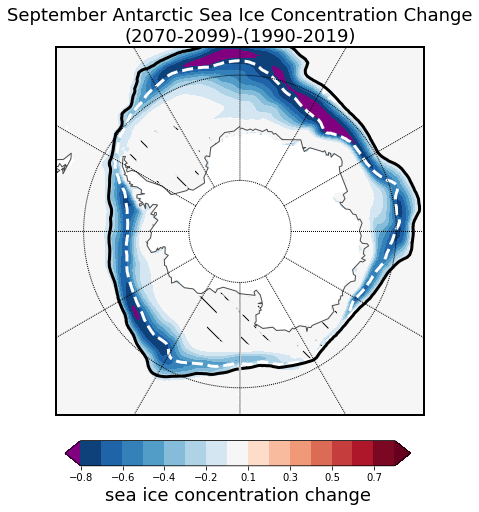

In [11]:
#-- plot everything together
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

#-- set nan to white
cmap=copy.copy(plt.cm.RdBu_r)
cmap.set_bad('white',1.)
cmap.set_under('purple')

map = Basemap(projection='spstere',lon_0=180, boundinglat=-55, resolution='c')
x, y = map(dataLR['LRmeshx2'], dataLR['LRmeshy2'])
levels = np.array([-0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

#-- LR

#-- plot pattern
im = plt.tricontourf(x, y, dataLR['elem_no_nan'], dataLR['LRclimate_change_signal_SEP'], levels=levels, cmap=cmap, extend='both')

#-- construct the end contour from beginning + climate change signal
plt.tricontour(x, y, dataLR['elem_no_nan'], conc_data_SEP_30yr_end_constructed, levels=[0.15], vmin=levels[0], vmax=levels[-1], colors=['w','w'], linewidths=[3], linestyles=['dashed','solid'])
# extent lines (begin)
plt.tricontour(x, y, dataLR['elem_no_nan'], dataLR['LRscen_conc_begin'], levels=[0.15], vmin=levels[0], vmax=levels[-1], colors=['k','b'], linewidths=[3])

#-- (non-)significance hatching
significance_hatching=np.abs(dataLR['LRclimate_change_signal_SEP']) > 2*z
# limit to area where ice is
significance_hatching[dataLR['LRscen_conc_begin']<0.15]=1.
imS = plt.tricontourf(x, y, dataLR['elem_no_nan'], ~significance_hatching, levels=[.9,1.1], hatches="\\", colors='none')

#-- draw grey coastlines and thick black outline
map.drawcoastlines(linewidth=1.0, linestyle='solid', color='0.3', antialiased=1)
map.drawmapboundary(linewidth=2.0, color='black')

map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

plt.title('September Antarctic Sea Ice Concentration Change\n(2070-2099)-(1990-2019)', fontsize=18)

#-- add colorbar at bottom
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.31, 0.05, 0.4, 0.05]) #[left, bottom, width, height] 
cbar = fig.colorbar(im, orientation='horizontal', cax=cbar_ax);
cbar.set_label("sea ice concentration change", fontsize=18)
plt.show()

In [12]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure3c_LR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()